# WINE QUALITY PREDICTION BY USING CLASSIFICATION

In [28]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

print("All imports successful!")
print(f"pandas: {pd.__version__}, numpy: {np.__version__}")


All imports successful!
pandas: 2.2.2, numpy: 1.26.4


In [5]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.shape

(1599, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### DATA COUNT

In [10]:
# Count of quality feature
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

##### COUNT PLOT GRAPH

<Axes: xlabel='quality', ylabel='count'>

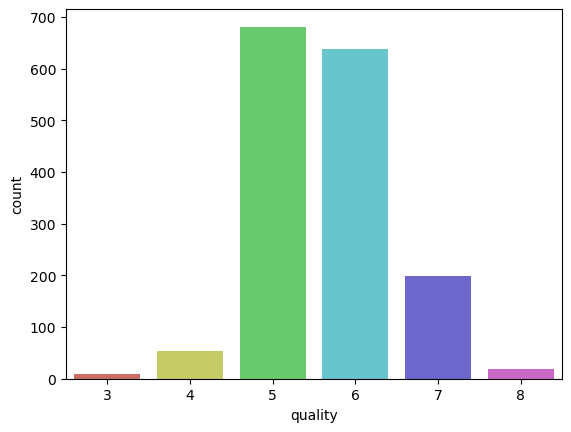

In [11]:
sns.countplot(x=df['quality'],palette='hls')

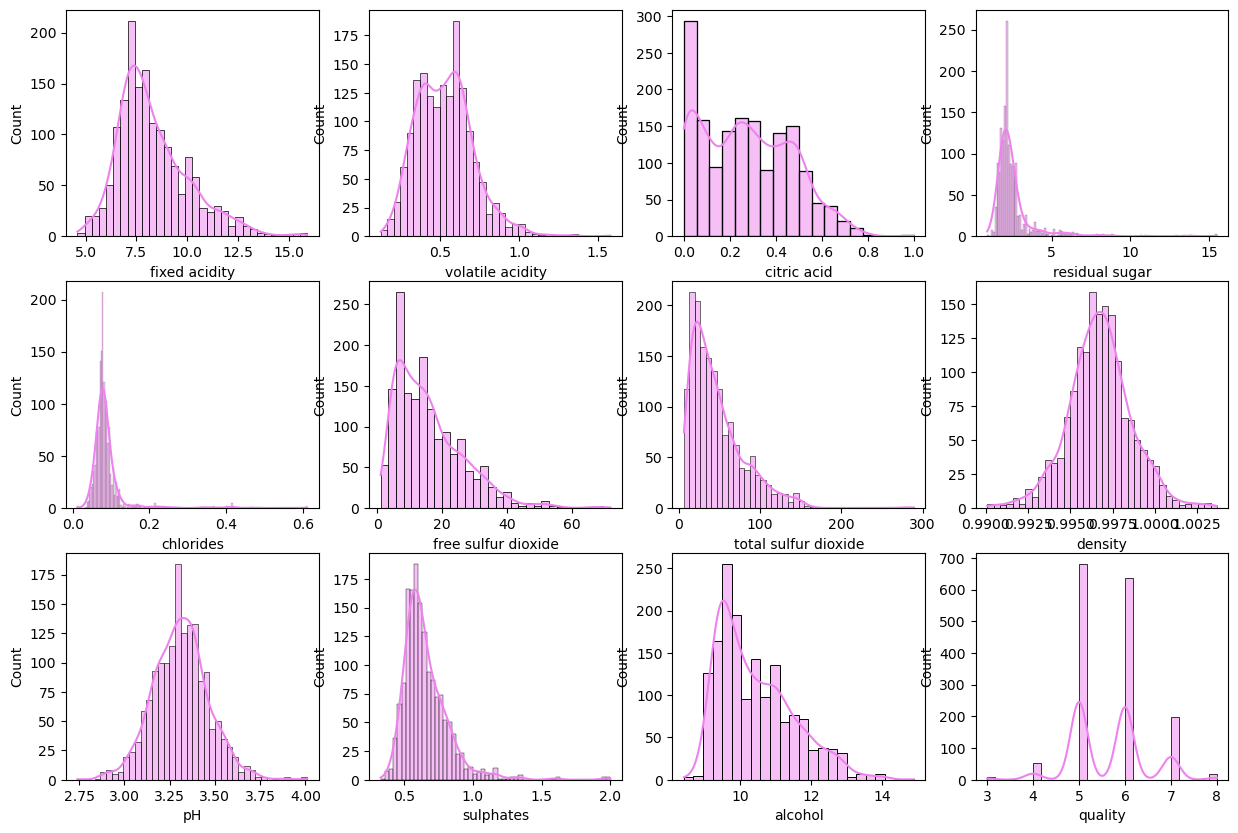

In [12]:
Num_fea = df.select_dtypes(exclude = 'object')
# distribution of plot each as subplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[k]], ax=axes[i][j], color='violet', kde=True)
        k += 1



In [13]:
# apply log trsansform on features
#df['volatile acidity'] = np.log1p(df['volatile acidity'])
#df['citric acid'] = np.log1p(df['citric acid'])
df['residual sugar'] = np.log1p(df['residual sugar'])
df['chlorides'] = np.log1p(df['chlorides'])
df['free sulfur dioxide'] = np.log1p(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.log1p(df['total sulfur dioxide'])
df['sulphates'] = np.log1p(df['sulphates'])
#df['alcohol'] = np.log1p(df['alcohol'])

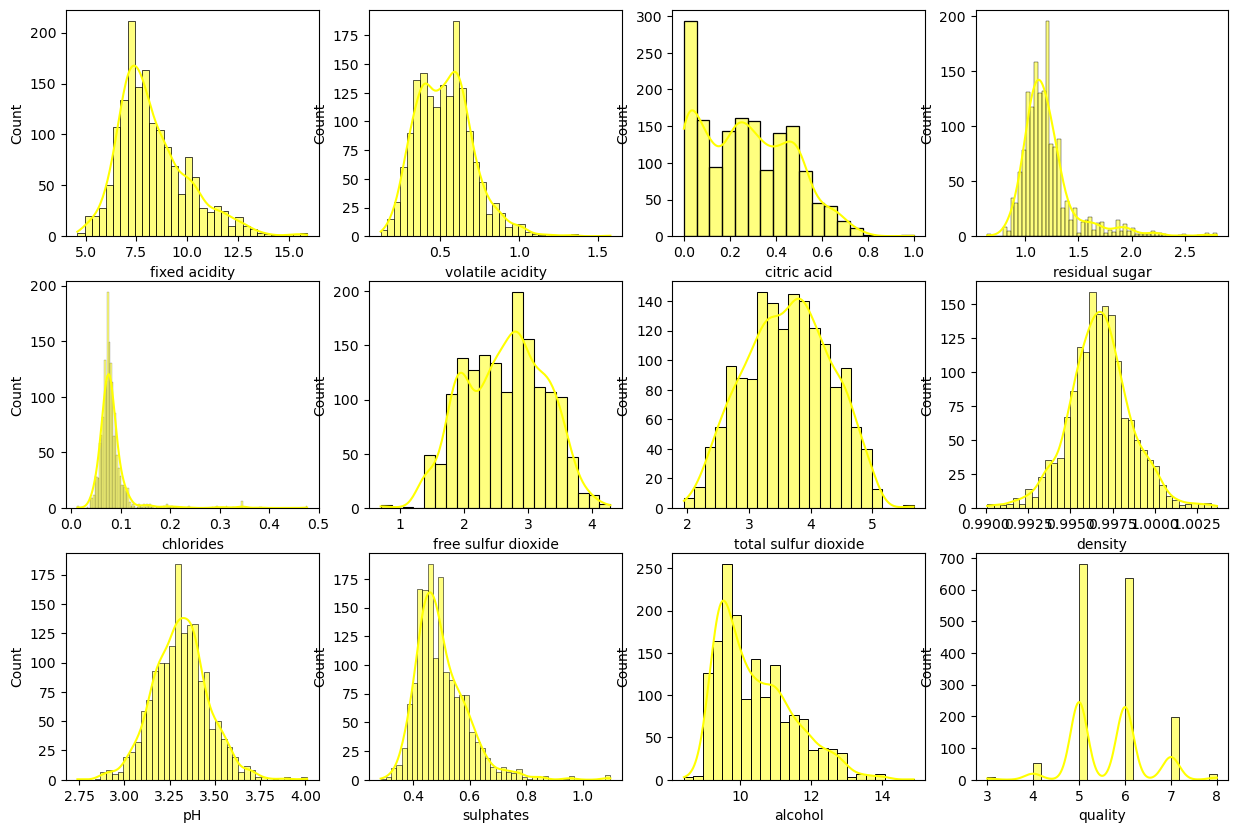

In [14]:
Num_fea = df.select_dtypes(exclude = 'object')
# distribution of plot each as subplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
k = 0
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[k]], ax=axes[i][j], color='yellow', kde=True)
        k += 1



In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.duplicated().sum()

240

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
x = df.drop('quality', axis= 'columns')
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,9.4
1,7.8,0.88,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.518794,9.8
2,7.8,0.76,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,9.8
3,11.2,0.28,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,9.8
5,7.4,0.66,0.00,1.029619,0.072321,2.639057,3.713572,0.9978,3.51,0.444686,9.4


In [19]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [20]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [21]:
# install imbalanced-learn if not available and import SMOTE
%pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

# create SMOTE oversampler (use correct parameter name)
oversample = SMOTE(k_neighbors=4, random_state=42)
# transform the dataset
X, y = oversample.fit_resample(x.fillna(0), y)

Note: you may need to restart the kernel to use updated packages.


  File "c:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\hp\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\hp\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [29]:
y.value_counts()


quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,1.216325,0.083563,2.640464,3.638549,0.996709,3.309787,0.501352,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.263457,0.040815,0.623095,0.688594,0.001869,0.155036,0.094269,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.641854,0.011929,0.693147,1.945910,0.990070,2.740000,0.285179,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.064711,0.067659,2.079442,3.135494,0.995600,3.210000,0.438255,9.500000,5.000000
50%,7.900000,0.520000,0.260000,1.163151,0.076035,2.708050,3.663562,0.996700,3.310000,0.482426,10.200000,6.000000
75%,9.200000,0.640000,0.430000,1.280934,0.087095,3.091042,4.158883,0.997820,3.400000,0.548121,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.803360,0.476855,4.290459,5.669881,1.003690,4.010000,1.098612,14.900000,8.000000


In [31]:
# apply standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.489531,0.451545,-1.261404,-0.654723,-0.277202,0.014609,0.245542,0.729546,1.129231,-0.656605,-1.131271
1,-0.255661,1.170182,-1.261404,0.167442,0.307569,1.280714,1.235434,0.200157,-0.865524,0.191618,-0.798802
2,-0.255661,0.691090,-1.066527,-0.163409,0.149256,0.485690,0.919200,0.306035,-0.479443,-0.014618,-0.798802
3,1.732236,-1.225275,1.466880,-0.654723,-0.304066,0.678561,1.073522,0.835423,-1.122912,-0.510797,-0.798802
4,-0.489531,0.291848,-1.261404,-0.788154,-0.304066,0.267032,0.481366,0.729546,1.129231,-0.656605,-1.131271


In [32]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

61

In [34]:
# support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
SVM_Accuracy = round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)
SVM_Accuracy

76.77

In [35]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

91

In [36]:
#  decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
DTC_Accuracy = round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)
DTC_Accuracy

74.75

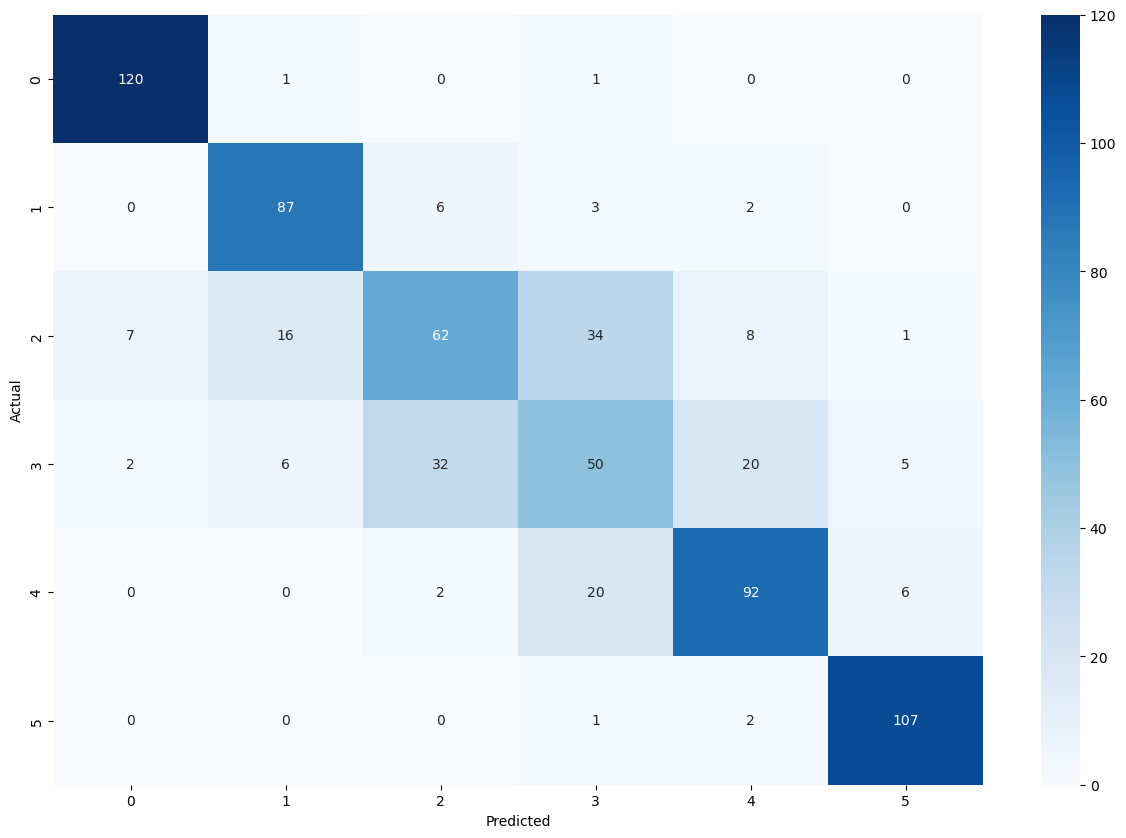

array([[120,   1,   0,   1,   0,   0],
       [  0,  87,   6,   3,   2,   0],
       [  7,  16,  62,  34,   8,   1],
       [  2,   6,  32,  50,  20,   5],
       [  0,   0,   2,  20,  92,   6],
       [  0,   0,   0,   1,   2, 107]], dtype=int64)

In [37]:
#heat for confusion matrix
from sklearn.metrics import confusion_matrix

# create confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
cm

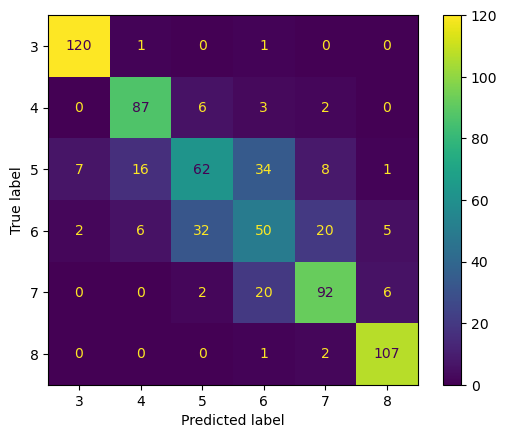

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()

In [39]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = model.predict(user_input)

print("predicted value", prediction)

predicted value [6]


In [40]:
#save scaler
import pickle
filename = 'scaler_model.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [41]:
#save decision tree classifier model
import pickle
filename = 'dtc_model.sav'
pickle.dump(model, open(filename, 'wb'))